# MSBD5010 Assignment 2

# Overview
In the assignment, you need to complete 4 image processing tasks.

For each function, the code skeleton is provided and your task is to **fill in the missing block** within
```
######### start of your code #########

######### end of your code #########
```


### **Please note that**

*   **DO NOT** edit the code outside the answering area.
*   **DO NOT** import any other image processing libraries like opencv by yourself. Any violations will result in 0 score penalty of the corresponding function.

1. Upload test images (task1_1.png, task1_2.png, ...) to to the Files 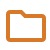 (the bottom option in the left menu bar) if you are using Colab.

2. Run the following code to import the libraries that you are allowed to use.

The helper function `read_img` is provided to read a gray image file and convert it to a `numpy.array` object of size [x, y].

The helper function `read_rgb` is provided to read a RGB image file and convert it to a `numpy.array` object of size [x, y, 3] (used only in task 1).

**DO NOT EDIT** this code cell.

In [2]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

def read_img(img_path):
    gray_img = Image.open(img_path).convert('L')
    img_data = np.asarray(gray_img)
    return img_data

def read_rgb(img_path):
    img = Image.open(img_path).convert('RGB')
    img_data = np.asarray(img)
    return img_data

Here is an exmple to load an image and visualize it.

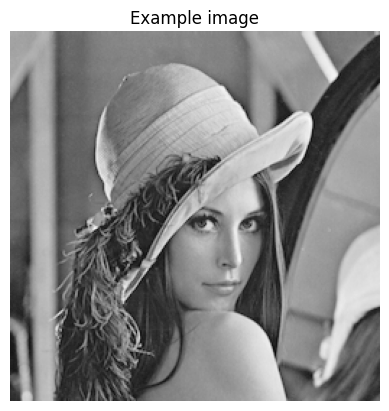

In [3]:
img_data = read_img('task2.png')
plt.imshow(img_data, cmap='gray')
plt.title('Example image')
plt.axis('off')
plt.show()

# Task 1 Color Complement Transformations.
Complete the function `color_complement_rgb` and `color_complement_hsi`that calculates the complements of the input RGB image `image` based on the RGB mapping functions and based on the HSI transformations separately.

For the conversion from RGB to HSI space, you can refer to the equations in
[section 8.3 HSI and RGB-HSI Transformations](https://www.cse.unr.edu/~looney/cs674/mgx8/unit8.pdf).

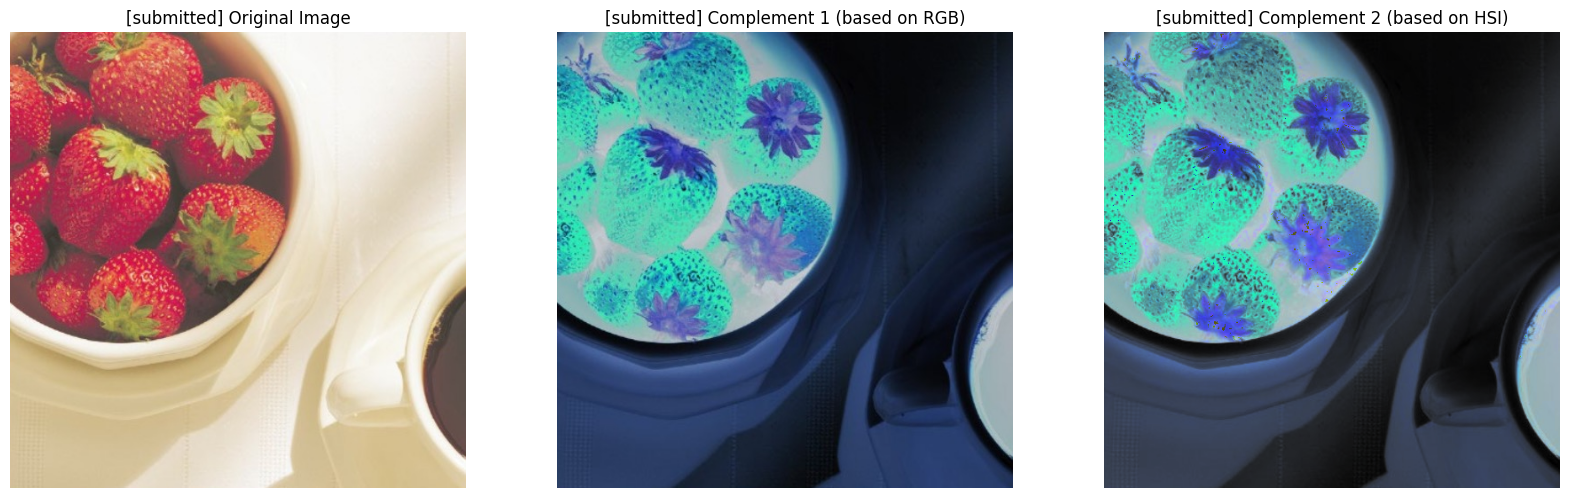

In [4]:
def color_complement_rgb(image):

    # complement image based on RGB mapping
    complement = image

    ######### start of your code #########
    
    # copy to make array writeable
    complement = complement.copy()
    
    # get complement color for each pixel
    for i, row in enumerate(complement):
        for j, (r, g, b) in enumerate(row):
            complement[i, j] = 255-r, 255-g, 255-b
    ######### end of your code #########

    return complement


def color_complement_hsi(image):

    # complement image based on HSI mapping
    complement = image

    ######### start of your code #########
    
    # Function to convert RGB to HSI based on implementation on https://www.cse.sc.edu/~tongy/csce763/lectures/lect14.pdf
    def RGB_to_HSI(r: int, g: int, b: int) -> tuple[float, float, float]:
        R, G, B = r / 255.0, g / 255.0, b / 255.0
        I = (R + G + B) / 3
        S = (I - np.min((R, G, B))) / I
        H = np.degrees(np.arccos(0.5*((R-G)+(R-B))/(((R-G)**2+(R-B)*(G-B))**0.5 + 10 ** (-8))))
        
        if b > g:
            H = 360 - H
            
        return H, S, I
    
    # Function to convert HSI to RGB based on implementation on https://www.cse.sc.edu/~tongy/csce763/lectures/lect14.pdf
    def HSI_to_RGB(H: float, S: float, I: float) -> tuple[int, int, int]:
        if H < 120:
            B = I*(1-S)
            R = I*(1+S*np.cos(np.radians(H))/np.cos(np.radians(60-H)))
            G = 3*I - (R + B)
        elif H < 240:
            H -= 120
            R = I*(1-S)
            G = I*(1+S*np.cos(np.radians(H))/np.cos(np.radians(60-H)))
            B = 3 * I - (R + G)
        else:
            H -= 240
            
            G = I*(1-S)
            B = I*(1+S*np.cos(np.radians(H))/np.cos(np.radians(60-H)))
            R = 3 * I - (G + B)
            
        return int(R*255), int(G*255), int(B*255)

    # Optional import to filter away deprectation warnings
    import warnings
    warnings.filterwarnings("ignore", category=DeprecationWarning)

    # Copy to make complement writeable
    complement = complement.copy()

    # Process each pixel
    for i, row in enumerate(complement):
        for j, (r, g, b) in enumerate(row):
            H, S, I = RGB_to_HSI(r, g, b)
            # Flip Hue and bound it by [0, 360], reverse intensity and keep S unchanged
            complement[i, j] = HSI_to_RGB((H+180)%360, S, 1-I)

    ######### end of your code #########

    return complement

img_data = read_rgb('task1.png')
complement_rgb = color_complement_rgb(img_data)
complement_hsi = color_complement_hsi(img_data)

plt.figure(figsize=(20, 30))
plt.subplot(1, 3, 1)
plt.imshow(img_data)
plt.title('[submitted] Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(complement_rgb)
plt.title('[submitted] Complement 1 (based on RGB)')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(complement_hsi)
plt.title('[submitted] Complement 2 (based on HSI)')
plt.axis('off')
plt.show()

# Task 2 Super Resolution By Interpolation
Complete the function `bilinear_interpolate` that upsamples the input `image` to higher resolution `new_size`.

Apply bilinear interpolation to calculate the intensities of new pixels.

(256, 256) (1024, 1024)


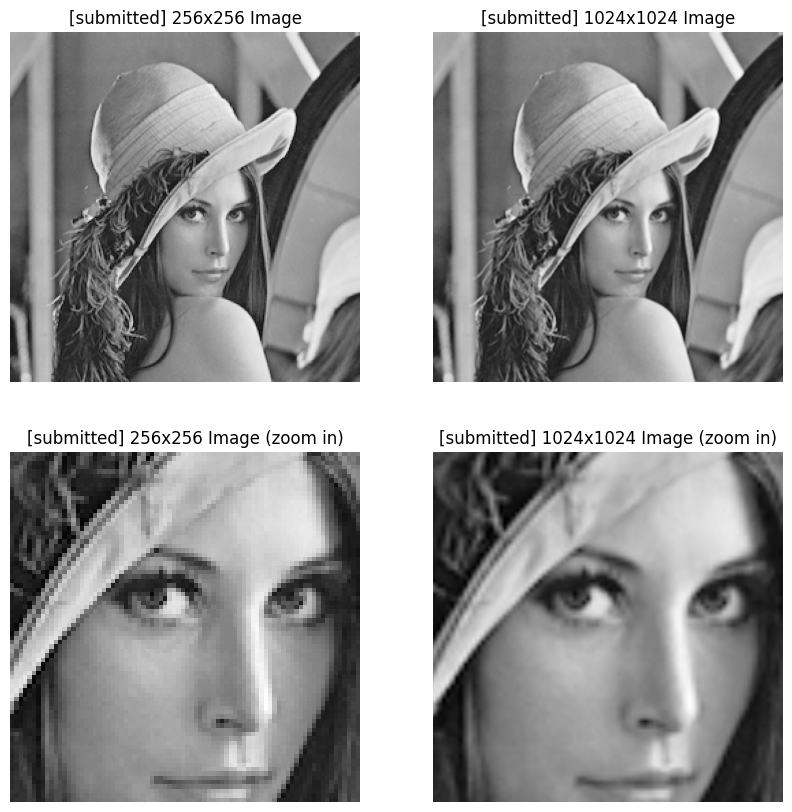

In [5]:
def bilinear_interpolate(image, new_size):

    resized_image = image

    ######### start of your code #########
    import math
    
    resized_image = resized_image.copy()
    
    original_rows, original_cols = image.shape
    row_factor, col_factor = (original_rows - 1)  / (new_size[0] - 1), (original_cols - 1) / (new_size[1] - 1)
    
    expanded_image = np.zeros(new_size)
    
    for i in range(new_size[0]):
        for j in range(new_size[1]):
            mapped_x, mapped_y = i * row_factor, j * col_factor
            
            x1, x2 = math.floor(mapped_x), math.ceil(mapped_x)
            y1, y2 = math.floor(mapped_y), math.ceil(mapped_y)
            
            if x1 == x2:
                if x2 == original_rows - 1:
                    x1 -= 1
                else:
                    x2 += 1
            if y1 == y2:
                if y2 == original_cols - 1:
                    y1 -= 1
                else:
                    y2 += 1
                    
            a_00, a_10, a_01, a_11 = 1/((x2-x1)*(y2-y1)) * np.dot(np.array([[x2*y2, -x2*y1, -x1*y2, x1*y1], 
                                                 [-y2, y1, y2, -y1], 
                                                 [-x2, x2, x1, -x1], 
                                                 [1, -1, -1, 1]]), np.transpose(np.array([resized_image[x1, y1],
                                                                                          resized_image[x1, y2],
                                                                                          resized_image[x2, y1],
                                                                                          resized_image[x2, y2]])))
            expanded_image[i, j] = a_00 + a_10 * mapped_x + a_01 * mapped_y + a_11 * mapped_x * mapped_y

    resized_image = expanded_image


    ######### end of your code #########

    return resized_image


img_data = read_img('task2.png')
super_res_image = bilinear_interpolate(img_data, new_size=(1024, 1024))

print(img_data.shape, super_res_image.shape)

plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.imshow(img_data, cmap='gray')
plt.title('[submitted] 256x256 Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(super_res_image, cmap='gray')
plt.title('[submitted] 1024x1024 Image')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(img_data[100:180, 100:180], cmap='gray')
plt.title('[submitted] 256x256 Image (zoom in)')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(super_res_image[400:720, 400:720], cmap='gray')
plt.title('[submitted] 1024x1024 Image (zoom in)')
plt.axis('off')
plt.show()


# Task 3 EM Segmentation
Complete the function `em_segmentation` which is a iterative scheme for finding parameters in a mixture model.

(512, 512)
66.29566347537839 398.24260618616165 0.31281397122668253
150.33567237220888 942.0493374429127 0.6871860287733176
65.95342068520189 448.6006364155797 0.294633228079351
148.312506872209 1060.8688629015369 0.705366771920649
65.35565625024945 449.90517039692423 0.2829928010301252
147.21135767324466 1120.319122199265 0.7170071989698747
64.5768654718152 434.6377915585665 0.273297062449674
146.41211740559726 1157.6972121078443 0.726702937550326
63.69184909773161 412.1261739379314 0.26436863654164544
145.73692948390902 1185.5002941015268 0.7356313634583547
62.738169255150595 385.94652183743165 0.2557456521277253
145.11405912047454 1209.0519240119897 0.7442543478722748
61.73329179107276 357.61669497524633 0.24721304964328406
144.510353251377 1230.8765076746263 0.7527869503567157
60.685317159163446 327.8108474919778 0.23866749825282446
143.90975082342254 1252.235045326116 0.7613325017471753
59.5996570636991 296.90141585762666 0.23007010604605166
143.30484488619098 1273.7743014052405 0

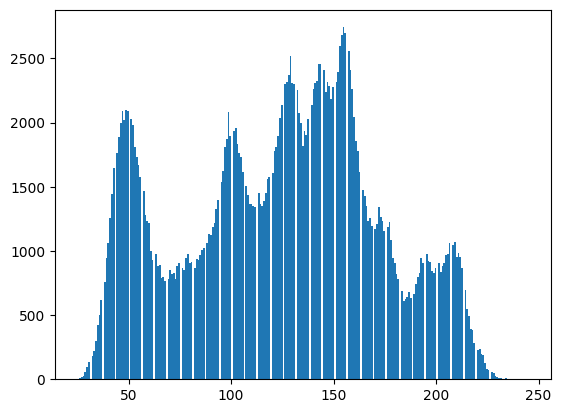

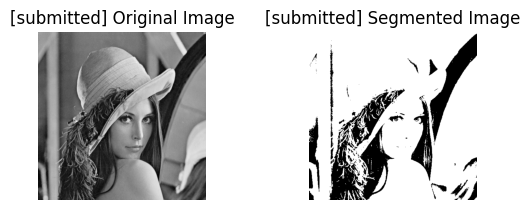

In [ ]:
def em_segmentation(image, iters=10):

    segmentation_image = image

    ######### start of your code #########
    
    # Determine initial values by observation
    print(image.shape)
    pixels = image.flatten()
    N = pixels.size
    plt.hist(pixels,bins=255)
    
    def gaussian_pdf(x, mu, v):
        return np.exp(-0.5 * ((x - mu)** 2) / v) / (np.sqrt(2 * np.pi * v))
            
    mu_1, mu_2 = 50.0, 150.0
    v_1, v_2 = 100.0, 100.0
    p_1, p_2 = 0.5, 0.5

    for i in range(iters):
        p_old_1 = p_1 * gaussian_pdf(pixels, mu_1, v_1)  # p(z|1)p(1)
        p_old_2 = p_2 * gaussian_pdf(pixels, mu_2, v_2)  # p(z|2)p(2)

        p_old_sum = p_old_1 + p_old_2
        p_old_1 /= p_old_sum
        p_old_2 /= p_old_sum
        
        # M-step: update parameters
        # Update means
        mu_1 = np.sum(p_old_1 * pixels) / np.sum(p_old_1)
        mu_2 = np.sum(p_old_2 * pixels) / np.sum(p_old_2)
        
        # Update variances
        v_1 = np.sum(p_old_1 * (pixels - mu_1)**2) / np.sum(p_old_1)
        v_2 = np.sum(p_old_2 * (pixels - mu_2)**2) / np.sum(p_old_2)
        
        # Update mixing coefficients
        p_1 = np.mean(p_old_1)
        p_2 = np.mean(p_old_2)
        
        print(mu_1, v_1, p_1)
        print(mu_2, v_2, p_2)
        
        # Check for convergence
        if abs(mu_1 - mu_2) < 10 * (-8):
            break
    
    # For write access
    segmentation_image = segmentation_image.copy()
    
    for i, row in enumerate(segmentation_image):
        for j, intensity in enumerate(row):
            segmentation_image[i, j] = 0 if gaussian_pdf(intensity, mu_1, v_1) * p_1 >= gaussian_pdf(intensity, mu_2, v_2) * p_2 else 255
    
    ######### end of your code #########

    return segmentation_image

img_data = read_img('task3.png')
segmented = em_segmentation(img_data)

plt.figure()
plt.subplot(2, 2, 1)
plt.imshow(img_data, cmap='gray')
plt.title('[submitted] Original Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(segmented, cmap='gray')
plt.title('[submitted] Segmented Image')
plt.axis('off')

plt.show()

# Task 4 Image Registration via RANSAC
Complete the function `image_registration` to perform 2D image registration through the RANSAC algorithm.
The parameter `reference_image` is the image for the `target_image` to register to. You will affinely transform `target_image` to `registered_image` which has the highest similarity with `reference_image`.

1. You may define your own helper function(s).

2. You are allowed to outer library for feature matching, ransac method and transformation.

3. Don't hard code parameters for the registration to acquired results.


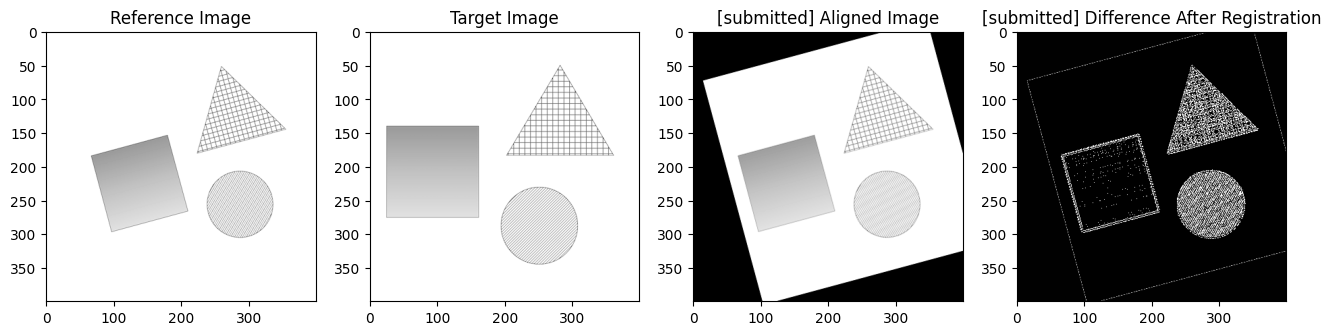

In [8]:
def image_registration(target_image, reference_image):

    registered_image = target_image

    ######### start of your code #########
    import cv2
    
    sift = cv2.SIFT_create()
    
    # Detect keypoints and compute descriptors
    (key_pts_ref, desc_ref), (key_pts_target, desc_target) = sift.detectAndCompute(reference_image.astype(np.uint8), None), \
                                            sift.detectAndCompute(target_image.astype(np.uint8), None)
    
    # Initialize feature matcher
    flann = cv2.FlannBasedMatcher(dict(algorithm=1, trees=5), dict(checks=50))
    
    # Perfom matching with knn
    knn_matches = flann.knnMatch(desc_ref, desc_target, k=2)
    
    # Apply Lowe's ratio test to filter good matches
    good_matches = []
    for m, n in knn_matches:
        if m.distance < 0.7 * n.distance:  # Ratio test threshold
            good_matches.append(m)
    
    # Filter for affine transformation
    if len(good_matches) > 3:
        src_pts = np.float32([key_pts_ref[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
        dst_pts = np.float32([key_pts_target[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)
        
        # Find affine transformation using RANSAC
        transform_matrix, mask = cv2.estimateAffinePartial2D(
            src_pts, dst_pts, method=cv2.RANSAC, 
            ransacReprojThreshold=3,
            confidence=0.99,
            maxIters=1000
        )
        
        # Apply affine transformation
        if transform_matrix is not None:
            registered_image = cv2.warpAffine(
                target_image,
                transform_matrix,
                (reference_image.shape[1], reference_image.shape[0]),
                flags=cv2.INTER_LINEAR + cv2.WARP_INVERSE_MAP,
                borderMode=cv2.BORDER_CONSTANT,
                borderValue=0
            )
        else:
            registered_image = target_image
    else:
        registered_image = target_image


    ######### end of your code #########

    return registered_image

reference_image = read_img('task4-r.png')
target_image = read_img('task4-t.png')

registered_image = image_registration(target_image, reference_image)

# Visualize the results
plt.figure(figsize=(16, 4))
plt.subplot(1, 4, 1)
plt.imshow(reference_image, cmap='gray')
plt.title('Reference Image')

plt.subplot(1, 4, 2)
plt.imshow(target_image, cmap='gray')
plt.title('Target Image')

plt.subplot(1, 4, 3)
plt.imshow(registered_image, cmap='gray')
plt.title('[submitted] Aligned Image')

plt.subplot(1, 4, 4)
plt.imshow(registered_image - reference_image, cmap='gray')
plt.title('[submitted] Difference After Registration')
plt.show()
